In [1]:
from statistics import mean

from matplotlib.pyplot import plot
import pandas as pd
import numpy as np

from utils import find_nearest, fill_empty

In [2]:
pd.set_option("display.max_rows", 1000)

In [3]:
MAX_RESISTANCE = 1000

In [4]:
STEPS = 256

In [5]:
steps = [i for i in range(STEPS)]

In [6]:
STEP = MAX_RESISTANCE / STEPS

In [7]:
STEP

3.90625

In [8]:
values = [(STEP * step) + STEP for step in steps]

In [9]:
values

[3.90625,
 7.8125,
 11.71875,
 15.625,
 19.53125,
 23.4375,
 27.34375,
 31.25,
 35.15625,
 39.0625,
 42.96875,
 46.875,
 50.78125,
 54.6875,
 58.59375,
 62.5,
 66.40625,
 70.3125,
 74.21875,
 78.125,
 82.03125,
 85.9375,
 89.84375,
 93.75,
 97.65625,
 101.5625,
 105.46875,
 109.375,
 113.28125,
 117.1875,
 121.09375,
 125.0,
 128.90625,
 132.8125,
 136.71875,
 140.625,
 144.53125,
 148.4375,
 152.34375,
 156.25,
 160.15625,
 164.0625,
 167.96875,
 171.875,
 175.78125,
 179.6875,
 183.59375,
 187.5,
 191.40625,
 195.3125,
 199.21875,
 203.125,
 207.03125,
 210.9375,
 214.84375,
 218.75,
 222.65625,
 226.5625,
 230.46875,
 234.375,
 238.28125,
 242.1875,
 246.09375,
 250.0,
 253.90625,
 257.8125,
 261.71875,
 265.625,
 269.53125,
 273.4375,
 277.34375,
 281.25,
 285.15625,
 289.0625,
 292.96875,
 296.875,
 300.78125,
 304.6875,
 308.59375,
 312.5,
 316.40625,
 320.3125,
 324.21875,
 328.125,
 332.03125,
 335.9375,
 339.84375,
 343.75,
 347.65625,
 351.5625,
 355.46875,
 359.375,
 363.281

In [10]:
# формула R = (R1 * R2) / (R1 + R2)

In [11]:
possible_values = []

In [12]:
for r1 in values:
    for r2 in values:
        possible_value = (r1 * r2) / (r1 + r2)
        possible_values.append(possible_value)

In [13]:
possible_values = sorted(list(set(possible_values)))

In [14]:
possible_values

[1.953125,
 2.6041666666666665,
 2.9296875,
 3.125,
 3.2552083333333335,
 3.3482142857142856,
 3.41796875,
 3.4722222222222223,
 3.515625,
 3.5511363636363638,
 3.5807291666666665,
 3.605769230769231,
 3.627232142857143,
 3.6458333333333335,
 3.662109375,
 3.676470588235294,
 3.689236111111111,
 3.700657894736842,
 3.7109375,
 3.7202380952380953,
 3.7286931818181817,
 3.7364130434782608,
 3.7434895833333335,
 3.75,
 3.7560096153846154,
 3.761574074074074,
 3.7667410714285716,
 3.771551724137931,
 3.7760416666666665,
 3.780241935483871,
 3.7841796875,
 3.787878787878788,
 3.791360294117647,
 3.794642857142857,
 3.7977430555555554,
 3.800675675675676,
 3.8034539473684212,
 3.8060897435897436,
 3.80859375,
 3.8109756097560976,
 3.8132440476190474,
 3.815406976744186,
 3.817471590909091,
 3.8194444444444446,
 3.8213315217391304,
 3.8231382978723403,
 3.8248697916666665,
 3.826530612244898,
 3.828125,
 3.829656862745098,
 3.8311298076923075,
 3.832547169811321,
 3.833912037037037,
 3.835227

In [15]:
len(possible_values)

31869

In [16]:
max(possible_values)

500.0

In [17]:
pt_50 = [value for value in possible_values if 40 < value < 69.3 ]

In [18]:
len(pt_50)

2285

In [19]:
pt_50

[40.0146484375,
 40.015243902439025,
 40.03299689440994,
 40.051118827160494,
 40.06901840490798,
 40.08669969512195,
 40.09789156626506,
 40.104166666666664,
 40.12142319277108,
 40.133568548387096,
 40.13847305389221,
 40.15261627906977,
 40.15531994047619,
 40.1719674556213,
 40.17857142857143,
 40.18841911764706,
 40.2046783625731,
 40.22074854651163,
 40.23663294797688,
 40.241745283018865,
 40.25233477011494,
 40.25735294117647,
 40.267857142857146,
 40.27777777777778,
 40.283203125,
 40.29837570621469,
 40.30257936507937,
 40.31337780898876,
 40.32821229050279,
 40.3343023255814,
 40.34288194444444,
 40.35738950276243,
 40.371737637362635,
 40.38592896174863,
 40.399966032608695,
 40.40948275862069,
 40.413851351351354,
 40.4275873655914,
 40.44117647058823,
 40.4546210106383,
 40.46630859375,
 40.46792328042328,
 40.48108552631579,
 40.48295454545455,
 40.49410994764398,
 40.506998697916664,
 40.50925925925926,
 40.51975388601036,
 40.532377577319586,
 40.544871794871796,
 40.5

In [20]:
psteps = [possible_values[i] - possible_values[i - 1]  for i in range(1, len(possible_values))]

In [21]:
mean(psteps)

0.015628432126270866

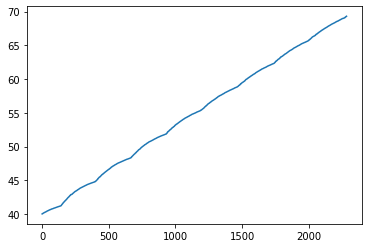

In [22]:
plot(pt_50)

In [23]:
df = pd.read_csv("data/pt_50.csv")

In [24]:
df["calc"] = df["R"].apply(lambda x: find_nearest(pt_50, x))

In [25]:
df["error"] = abs(df["R"] - df["calc"])

In [26]:
df

,T,R,calc,error
0,-50,40.160,40.155320,0.004680
1,-49,40.358,40.357390,0.000610
2,-48,40.556,40.554775,0.001225
3,-47,40.754,40.749707,0.004293
4,-46,40.952,40.953947,0.001947
5,-45,41.150,41.150841,0.000841
6,-44,41.348,41.350446,0.002446
7,-43,41.546,41.548295,0.002295
8,-42,41.744,41.738014,0.005986
9,-41,41.942,41.940789,0.001211


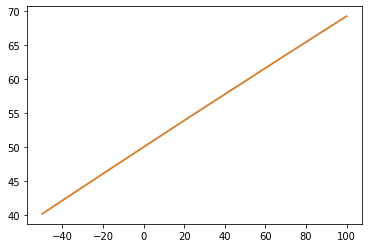

In [27]:
plot(df["T"], df["R"], df["T"], df["calc"])

In [28]:
df.to_csv("data/pt_50_ext.csv", index=False)

In [29]:
df_pt_100 = pd.read_csv("data/pt_100.csv")

In [30]:
pt_100 = [value for value in possible_values if 80 < value < 140 ]

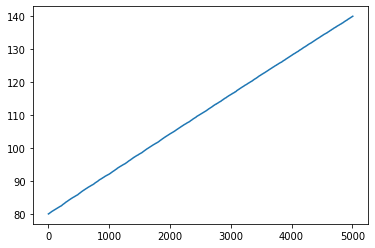

In [31]:
plot(pt_100)

In [32]:
df_pt_100["calc"] = df_pt_100["R"].apply(lambda x: find_nearest(pt_100, x))

In [33]:
df_pt_100["error"] = abs(df_pt_100["R"] - df_pt_100["calc"])

In [34]:
df_pt_100

,T,R,calc,error
0,-50,80.310,80.305233,0.004767
1,-49,80.705,80.706522,0.001522
2,-48,81.100,81.092539,0.007461
3,-47,81.495,81.498580,0.003580
4,-46,81.890,81.896034,0.006034
5,-45,82.290,82.289210,0.000790
6,-44,82.690,82.687500,0.002500
7,-43,83.085,83.086493,0.001493
8,-42,83.480,83.476027,0.003973
9,-41,83.875,83.881579,0.006579


In [35]:
df_pt_100.to_csv("data/pt_100_ext.csv", index=False)

In [36]:
mapping_pt_100 = {r: find_nearest(pt_100, r) for r in df_pt_100["R"]}

In [37]:
mapping_pt_100

{80.31: 80.30523255813954,
 80.705: 80.70652173913044,
 81.1: 81.09253875968992,
 81.495: 81.49857954545455,
 81.89: 81.89603365384616,
 82.29: 82.28920990566037,
 82.69: 82.6875,
 83.085: 83.08649289099526,
 83.48: 83.47602739726027,
 83.875: 83.88157894736842,
 84.27: 84.27254098360656,
 84.665: 84.6700465425532,
 85.06: 85.05969101123596,
 85.455: 85.44921875,
 85.85: 85.84449404761905,
 86.245: 86.24780957943925,
 86.64: 86.63974719101124,
 87.035: 87.02956989247312,
 87.43: 87.4411610878661,
 87.825: 87.81492248062015,
 88.22: 88.2260101010101,
 88.615: 88.61400462962963,
 89.01: 89.00908119658119,
 89.405: 89.40077319587628,
 89.8: 89.80129076086956,
 90.195: 90.18049568965517,
 90.59: 90.58665644171779,
 90.98: 90.99264705882354,
 91.37: 91.37144183168317,
 91.765: 91.766357421875,
 92.16: 92.16194509345794,
 92.555: 92.54807692307692,
 92.95: 92.94181034482759,
 93.34: 93.34096858638743,
 93.73: 93.72674851190476,
 94.125: 94.12350597609561,
 94.52: 94.51622596153847,
 94.91: 9

In [38]:
errors_pt_100 = [abs(k - v) / k for k, v in mapping_pt_100.items()]

In [39]:
errors_pt_100

[5.93629916631271e-05,
 1.8855574381252208e-05,
 9.200049704166049e-05,
 4.392349781633473e-05,
 7.367998346757646e-05,
 9.601340863228353e-06,
 3.0233401862350058e-05,
 1.7968237290315206e-05,
 4.7587478913948616e-05,
 7.843752451177099e-05,
 3.015288485303015e-05,
 5.9606006651960786e-05,
 3.632597743323041e-06,
 6.765256567782218e-05,
 6.413456471687028e-05,
 3.257672258385069e-05,
 2.917924616365408e-06,
 6.238992964757606e-05,
 0.0001276574158309471,
 0.00011474545265981615,
 6.812628667087983e-05,
 1.1232526890047624e-05,
 1.0322474090695267e-05,
 4.727704405478326e-05,
 1.4373729059750424e-05,
 0.00016081058090602367,
 3.690869060835389e-05,
 0.00013900921986735677,
 1.578014318886487e-05,
 1.4792370457139776e-05,
 2.1105614778083037e-05,
 7.479959940669897e-05,
 8.810817829387472e-05,
 1.0376970081739681e-05,
 3.468994020318768e-05,
 1.5872763924411627e-05,
 3.992846446814449e-05,
 0.00012511853334741768,
 1.5224479088519987e-05,
 8.490516745918618e-05,
 8.867668236425659e-05,


In [40]:
new_values = {temp: None for temp in range(-50, 101)}

In [41]:
df

,T,R,calc,error
0,-50,40.160,40.155320,0.004680
1,-49,40.358,40.357390,0.000610
2,-48,40.556,40.554775,0.001225
3,-47,40.754,40.749707,0.004293
4,-46,40.952,40.953947,0.001947
5,-45,41.150,41.150841,0.000841
6,-44,41.348,41.350446,0.002446
7,-43,41.546,41.548295,0.002295
8,-42,41.744,41.738014,0.005986
9,-41,41.942,41.940789,0.001211


In [42]:
as_dict = {int(row["T"]): row["R"] for _, row in df.iterrows()}

In [43]:
for temp in sorted(list(new_values)):
    res = as_dict.get(temp)
    new_values[temp] = res

In [44]:
new_values

{-50: 40.16,
 -49: 40.358,
 -48: 40.556,
 -47: 40.754,
 -46: 40.952,
 -45: 41.15,
 -44: 41.348,
 -43: 41.546,
 -42: 41.744,
 -41: 41.942,
 -40: 42.14,
 -39: 42.337,
 -38: 42.534,
 -37: 42.731,
 -36: 42.928,
 -35: 43.125,
 -34: 43.322,
 -33: 43.519,
 -32: 43.716,
 -31: 43.913,
 -30: 44.11,
 -29: 44.307,
 -28: 44.504,
 -27: 44.701,
 -26: 44.898,
 -25: 45.095,
 -24: 45.292,
 -23: 45.489,
 -22: 45.686,
 -21: 45.883,
 -20: 46.08,
 -19: 46.276,
 -18: 46.472,
 -17: 46.668,
 -16: 46.864,
 -15: 47.06,
 -14: 47.256,
 -13: 47.452,
 -12: 47.648,
 -11: 47.844,
 -10: 48.04,
 -9: 48.236,
 -8: 48.432,
 -7: 48.628,
 -6: 48.824,
 -5: 49.02,
 -4: 49.216,
 -3: 49.412,
 -2: 49.608,
 -1: 49.804,
 0: 50.0,
 1: 50.195,
 2: 50.39,
 3: 50.585,
 4: 50.78,
 5: 50.975,
 6: 51.17,
 7: 51.365,
 8: 51.56,
 9: 51.755,
 10: 51.95,
 11: 52.145,
 12: 52.34,
 13: 52.535,
 14: 52.73,
 15: 52.925,
 16: 53.12,
 17: 53.315,
 18: 53.51,
 19: 53.705,
 20: 53.9,
 21: 54.094,
 22: 54.288,
 23: 54.482,
 24: 54.676,
 25: 54.87,
 26

In [45]:
for temp in sorted(list(new_values)):
    res = new_values.get(temp)
    if res is None:
        prev_r = new_values[temp - 1]
        next_r = new_values[temp + 1]
        mean = round((prev_r + next_r) / 2, 3)
        new_values[temp] = mean

In [46]:
new_values

{-50: 40.16,
 -49: 40.358,
 -48: 40.556,
 -47: 40.754,
 -46: 40.952,
 -45: 41.15,
 -44: 41.348,
 -43: 41.546,
 -42: 41.744,
 -41: 41.942,
 -40: 42.14,
 -39: 42.337,
 -38: 42.534,
 -37: 42.731,
 -36: 42.928,
 -35: 43.125,
 -34: 43.322,
 -33: 43.519,
 -32: 43.716,
 -31: 43.913,
 -30: 44.11,
 -29: 44.307,
 -28: 44.504,
 -27: 44.701,
 -26: 44.898,
 -25: 45.095,
 -24: 45.292,
 -23: 45.489,
 -22: 45.686,
 -21: 45.883,
 -20: 46.08,
 -19: 46.276,
 -18: 46.472,
 -17: 46.668,
 -16: 46.864,
 -15: 47.06,
 -14: 47.256,
 -13: 47.452,
 -12: 47.648,
 -11: 47.844,
 -10: 48.04,
 -9: 48.236,
 -8: 48.432,
 -7: 48.628,
 -6: 48.824,
 -5: 49.02,
 -4: 49.216,
 -3: 49.412,
 -2: 49.608,
 -1: 49.804,
 0: 50.0,
 1: 50.195,
 2: 50.39,
 3: 50.585,
 4: 50.78,
 5: 50.975,
 6: 51.17,
 7: 51.365,
 8: 51.56,
 9: 51.755,
 10: 51.95,
 11: 52.145,
 12: 52.34,
 13: 52.535,
 14: 52.73,
 15: 52.925,
 16: 53.12,
 17: 53.315,
 18: 53.51,
 19: 53.705,
 20: 53.9,
 21: 54.094,
 22: 54.288,
 23: 54.482,
 24: 54.676,
 25: 54.87,
 26

In [47]:
fill_empty(df_pt_100)

{-50: 80.31,
 -49: 80.705,
 -48: 81.1,
 -47: 81.495,
 -46: 81.89,
 -45: 82.29,
 -44: 82.69,
 -43: 83.085,
 -42: 83.48,
 -41: 83.875,
 -40: 84.27,
 -39: 84.665,
 -38: 85.06,
 -37: 85.455,
 -36: 85.85,
 -35: 86.245,
 -34: 86.64,
 -33: 87.035,
 -32: 87.43,
 -31: 87.825,
 -30: 88.22,
 -29: 88.615,
 -28: 89.01,
 -27: 89.405,
 -26: 89.8,
 -25: 90.195,
 -24: 90.59,
 -23: 90.98,
 -22: 91.37,
 -21: 91.765,
 -20: 92.16,
 -19: 92.555,
 -18: 92.95,
 -17: 93.34,
 -16: 93.73,
 -15: 94.125,
 -14: 94.52,
 -13: 94.91,
 -12: 95.3,
 -11: 95.695,
 -10: 96.09,
 -9: 96.48,
 -8: 96.87,
 -7: 97.26,
 -6: 97.65,
 -5: 98.045,
 -4: 98.44,
 -3: 98.83,
 -2: 99.22,
 -1: 99.61,
 0: 100.0,
 1: 100.39,
 2: 100.78,
 3: 101.17,
 4: 101.56,
 5: 101.95,
 6: 102.34,
 7: 102.73,
 8: 103.12,
 9: 103.51,
 10: 103.9,
 11: 104.29,
 12: 104.68,
 13: 105.07,
 14: 105.46,
 15: 105.85,
 16: 106.24,
 17: 106.63,
 18: 107.02,
 19: 107.405,
 20: 107.79,
 21: 108.18,
 22: 108.57,
 23: 108.96,
 24: 109.35,
 25: 109.735,
 26: 110.12,
 27:

In [48]:
df_pt_500 = pd.read_csv("data/pt_500.csv")

In [49]:
df_pt_500

,T,R
0,-50,401.570
1,-49,403.551
2,-48,405.532
3,-47,407.513
4,-46,409.494
5,-45,411.475
6,-44,413.456
7,-43,415.437
8,-42,417.418
9,-41,419.399


In [50]:
fill_empty(df_pt_500)

{-50: 401.57,
 -49: 403.551,
 -48: 405.532,
 -47: 407.513,
 -46: 409.494,
 -45: 411.475,
 -44: 413.456,
 -43: 415.437,
 -42: 417.418,
 -41: 419.399,
 -40: 421.38,
 -39: 423.354,
 -38: 425.328,
 -37: 427.302,
 -36: 429.276,
 -35: 431.25,
 -34: 433.224,
 -33: 435.198,
 -32: 437.172,
 -31: 439.146,
 -30: 441.12,
 -29: 443.088,
 -28: 445.056,
 -27: 447.024,
 -26: 448.992,
 -25: 450.96,
 -24: 452.928,
 -23: 454.896,
 -22: 456.864,
 -21: 458.832,
 -20: 460.8,
 -19: 462.763,
 -18: 464.726,
 -17: 466.689,
 -16: 468.652,
 -15: 470.615,
 -14: 472.578,
 -13: 474.541,
 -12: 476.504,
 -11: 478.467,
 -10: 480.43,
 -9: 482.387,
 -8: 484.344,
 -7: 486.301,
 -6: 488.258,
 -5: 490.215,
 -4: 492.172,
 -3: 494.129,
 -2: 496.086,
 -1: 498.043,
 0: 500.0,
 1: 501.951,
 2: 503.902,
 3: 505.853,
 4: 507.804,
 5: 509.755,
 6: 511.706,
 7: 513.657,
 8: 515.608,
 9: 517.559,
 10: 519.51,
 11: 521.455,
 12: 523.4,
 13: 525.345,
 14: 527.29,
 15: 529.235,
 16: 531.18,
 17: 533.125,
 18: 535.07,
 19: 537.015,
 20: 

In [51]:
df_pt_1000 = pd.read_csv("data/pt_1000.csv")

In [52]:
df_pt_1000

,T,R
0,-50,803.150
1,-49,807.110
2,-48,811.070
3,-47,815.030
4,-46,818.990
5,-45,822.950
6,-44,826.910
7,-43,830.870
8,-42,834.830
9,-41,838.790


In [53]:
new_values = []
for v1 in possible_values:
    for v2 in values:
        new_values.append(v1 + v2)

In [54]:
new_values = np.array(sorted(list(set(new_values))))

In [55]:
len(new_values)

5051378

In [56]:
pt_500 = [v for v in new_values if 400 < v < 700]

In [57]:
len(pt_500)

1429561

In [58]:
df_pt_500["calc"] = df_pt_500["R"].apply(lambda x: find_nearest(pt_500, x))

In [59]:
df_pt_500["error"] = abs(df_pt_500["R"] - df_pt_500["calc"])

In [60]:
df_pt_500.to_csv("data/pt_500_ext.csv", index=False)

In [61]:
df_pt_1000 = pd.read_csv("data/pt_1000.csv")

In [62]:
pt_1000 = [v for v in new_values if 800 < v < 1400]

In [63]:
df_pt_1000["calc"] = df_pt_1000["R"].apply(lambda x: find_nearest(pt_1000, x))

In [64]:
df_pt_1000["error"] = abs(df_pt_1000["R"] - df_pt_1000["calc"])

In [65]:
df_pt_1000.to_csv("data/pt_1000_ext.csv", index=False)

In [66]:
pt_50 = [value for value in new_values if 40 < value < 70]

In [67]:
df_pt_50 = pd.read_csv("data/pt_50.csv")

In [68]:
df_pt_50["calc"] = df_pt_50["R"].apply(lambda x: find_nearest(pt_50, x))

In [69]:
df_pt_50["error"] = abs(df_pt_50["R"] - df_pt_50["calc"])

In [70]:
df_pt_50["error"].max()

0.006249999999994316

In [71]:
df_pt_50.to_csv("data/pt_50_ext.csv", index=False)

In [72]:
pt_100 = [value for value in new_values if 80 < value < 140]

In [73]:
df_pt_100 = pd.read_csv("data/pt_100.csv")

In [74]:
df_pt_100["calc"] = df_pt_100["R"].apply(lambda x: find_nearest(pt_100, x))

In [75]:
df_pt_100["error"] = abs(df_pt_100["R"] - df_pt_100["calc"])

In [76]:
df_pt_100["error"].max()

0.006249999999994316

In [77]:
df_pt_100.to_csv("data/pt_100_ext.csv")